In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [6]:
a_ind = pd.read_csv('/content/a_ind.csv')
b_ind = pd.read_csv('/content/b_ind.csv')
c_ind = pd.read_csv('/content/c_ind.csv')
a_ind.head()

,HHID,PIDWON,I_WGC,REGION1,H_INC_TOT,DEATH_I_YN,PRE_RES,HH_REL,SEX,BIRTH_Y,...,OUOOP_1_MED,OUOOP_1_DENT,OUOOP_1_ORT,OUOOP_2,OUOOP_2_MED,OUOOP_2_DENT,OUOOP_2_ORT,IN1YEAR,I_PHI_N,I_FFS_YN
0,112001011,11200101,3066.669714,26,627,2,1,10,2,1938,...,5000,,,81060,81060,,,0,,
1,112002011,11200201,1297.872486,26,979,2,1,10,2,1946,...,8200,,,580,580,,,0,,
2,112002011,11200202,2728.104905,,,,,,,,...,,,,,,,,,,
3,112003011,11200301,3422.030522,26,4497,2,1,10,1,1975,...,44600,22800,,4200,0,4200,,0,1,1
4,112003011,11200302,2898.667157,26,4497,2,1,20,2,1978,...,,,,,,,,0,1,1


In [7]:
len(a_ind['HHID'].unique()), len(a_ind['PIDWON'].unique())
# 가구식별번호, 가구원고유번호

(6748, 16587)

## ind1

In [11]:
a_ind1 = a_ind[a_ind['REGION1']!=' ']
a_ind1.shape

(14741, 294)

In [12]:
b_ind1 = b_ind[b_ind['REGION1']!=' ']
b_ind1.shape

(13530, 316)

In [13]:
c_ind1 = c_ind[c_ind['REGION1']!=' ']
c_ind1.shape

(12874, 322)

In [14]:
a_ind1.reset_index(drop=True, inplace=True)
b_ind1.reset_index(drop=True, inplace=True)
c_ind1.reset_index(drop=True, inplace=True)

### 필요한 컬럼 추출


In [15]:
a_ind1 = a_ind1[['HHID', 'PIDWON', 'HT', 'WT', 'BIRTH_Y',
                 'REGION1', 'SEX', 'MARR', 'EDU',
                 'DISA_YN', 'ECO1', 'HEALTH_INS',
                 'CD', 'CD1_HTN', 'CD2_HTN', 'CD1_DM', 'CD2_DM',
                 'CD1_MD', 'CD2_MD', 'CD1_DMN', 'CD2_DMN',
                 'P1', 'P1_1', 'WTMG', 'S1', 'D1', 'HS1', 'HS_SRH', ]]

a_ind1.columns = ['가구식별번호', '가구원고유번호', '키', '몸무게', '출생년도',
                  '시도', '성별', '결혼상태', '교육수준',
                  '장애유무', '경제활동 참여 상태', '의료보장 형태',
                  '만성질환 유무', '고혈압 유무', '고혈압 진단시기', '당뇨병 유무', '당뇨병 진단시기',
                  '우울증/조울증 유무', '우울증/조울증 진단시기', '치매 유무', '치매 진단시기',
                  '규칙적 운동 실천 여부', '규칙적으로 운동하지 않는 이유','체중 조절 시도 여부',
                  '평생 흡연 여부', '음주 빈도', '스트레스 인지 정도', '주관적 건강상태']

In [16]:
b_ind1 = b_ind1[['HHID', 'PIDWON', 'HT', 'WT', 'BIRTH_Y',
                 'REGION1', 'SEX', 'MARR', 'EDU',
                 'DISA_YN', 'ECO1', 'HEALTH_INS',
                 'CD', 'CD1_HTN', 'CD2_HTN', 'CD1_DM', 'CD2_DM',
                 'CD1_MD', 'CD2_MD', 'CD1_DMN', 'CD2_DMN',
                 'P1', 'P1_1', 'WTMG', 'S1', 'D1', 'HS1', 'HS_SRH',
                 'AH1', 'AH1_1_D', 'AH1_2_D', 'AH1_3_D', 'AH1_4_D', 'AH1_5_D',
                 'AH1_6_D', 'AH1_7_D', 'AH1_8_D', 'AH1_9_D', 'AH1_10_D']]

b_ind1.columns = ['가구식별번호', '가구원고유번호', '키', '몸무게', '출생년도',
                  '시도', '성별', '결혼상태', '교육수준',
                  '장애유무', '경제활동 참여 상태', '의료보장 형태',
                  '만성질환 유무', '고혈압 유무', '고혈압 진단시기', '당뇨병 유무', '당뇨병 진단시기',
                  '우울증/조울증 유무', '우울증/조울증 진단시기', '치매 유무', '치매 진단시기',
                  '규칙적 운동 실천 여부', '규칙적으로 운동하지 않는 이유','체중 조절 시도 여부',
                  '평생 흡연 여부', '음주 빈도', '스트레스 인지 정도', '주관적 건강상태',
                  '병의원 미충족의료 경험', '병의원 미충족의료 발생 이유(1)','병의원 미충족의료 발생 이유(2)',
                  '병의원 미충족의료 발생 이유(3)','병의원 미충족의료 발생 이유(4)','병의원 미충족의료 발생 이유(5)',
                  '병의원 미충족의료 발생 이유(6)','병의원 미충족의료 발생 이유(7)','병의원 미충족의료 발생 이유(8)',
                  '병의원 미충족의료 발생 이유(9)','병의원 미충족의료 발생 이유(10)']

In [18]:
c_ind1 = c_ind1[['HHID', 'PIDWON', 'HT', 'WT', 'BIRTH_Y',
                 'REGION1', 'SEX', 'MARR', 'EDU',
                 'DISA_YN', 'ECO1', 'HEALTH_INS',
                 'CD', 'CD1_HTN', 'CD2_HTN', 'CD1_DM', 'CD2_DM',
                 'CD1_MD', 'CD2_MD', 'CD1_DMN', 'CD2_DMN',
                 'P1', 'P1_1', 'WTMG', 'S1', 'D1', 'HS1', 'HS_SRH',
                 'AH1', 'AH1_1_D', 'AH1_2_D', 'AH1_3_D', 'AH1_4_D', 'AH1_5_D',
                 'AH1_6_D', 'AH1_7_D', 'AH1_8_D', 'AH1_9_D', 'AH1_10_D']]

c_ind1.columns = ['가구식별번호', '가구원고유번호', '키', '몸무게', '출생년도',
                  '시도', '성별', '결혼상태', '교육수준',
                  '장애유무', '경제활동 참여 상태', '의료보장 형태',
                  '만성질환 유무', '고혈압 유무', '고혈압 진단시기', '당뇨병 유무', '당뇨병 진단시기',
                  '우울증/조울증 유무', '우울증/조울증 진단시기', '치매 유무', '치매 진단시기',
                  '규칙적 운동 실천 여부', '규칙적으로 운동하지 않는 이유','체중 조절 시도 여부',
                  '평생 흡연 여부', '음주 빈도', '스트레스 인지 정도', '주관적 건강상태',
                  '병의원 미충족의료 경험', '병의원 미충족의료 발생 이유(1)','병의원 미충족의료 발생 이유(2)',
                  '병의원 미충족의료 발생 이유(3)','병의원 미충족의료 발생 이유(4)','병의원 미충족의료 발생 이유(5)',
                  '병의원 미충족의료 발생 이유(6)','병의원 미충족의료 발생 이유(7)','병의원 미충족의료 발생 이유(8)',
                  '병의원 미충족의료 발생 이유(9)','병의원 미충족의료 발생 이유(10)']

## ind2

In [19]:
from sklearn.preprocessing import LabelEncoder

a_ind2 = a_ind1.copy()
label_encoder = LabelEncoder()
for i in a_ind2.columns[6:]:
    a_ind2[i] = label_encoder.fit_transform(a_ind2[i])

b_ind2 = b_ind1.copy()
label_encoder = LabelEncoder()
for i in b_ind2.columns[6:]:
    b_ind2[i] = label_encoder.fit_transform(b_ind2[i])

c_ind2 = c_ind1.copy()
label_encoder = LabelEncoder()
for i in c_ind2.columns[6:]:
    c_ind2[i] = label_encoder.fit_transform(c_ind2[i])

In [21]:
a_ind2['연령'] = 2020-a_ind1['출생년도'].astype('int')
b_ind2['연령'] = 2021-b_ind1['출생년도'].astype('int')
c_ind2['연령'] = 2022-c_ind1['출생년도'].astype('int')
# a_ind2['연령']

In [22]:
a_ind2.loc[(a_ind2['연령'] >= 1), '연령_그룹'] = 1 #'30대 이하'
a_ind2.loc[(a_ind2['연령'] >= 40), '연령_그룹'] = 2 #'40대'
a_ind2.loc[(a_ind2['연령'] >= 50), '연령_그룹'] = 3 #'50대'
a_ind2.loc[(a_ind2['연령'] >= 60), '연령_그룹'] = 4 #'60대'
a_ind2.loc[(a_ind2['연령'] >= 70), '연령_그룹'] = 5 #'70대 이상'

In [23]:
b_ind2.loc[(b_ind2['연령'] >= 1), '연령_그룹'] = 1 #'30대 이하'
b_ind2.loc[(b_ind2['연령'] >= 40), '연령_그룹'] = 2 #'40대'
b_ind2.loc[(b_ind2['연령'] >= 50), '연령_그룹'] = 3 #'50대'
b_ind2.loc[(b_ind2['연령'] >= 60), '연령_그룹'] = 4 #'60대'
b_ind2.loc[(b_ind2['연령'] >= 70), '연령_그룹'] = 5 #'70대 이상'

In [24]:
c_ind2.loc[(c_ind2['연령'] >= 1), '연령_그룹'] = 1 #'30대 이하'
c_ind2.loc[(c_ind2['연령'] >= 40), '연령_그룹'] = 2 #'40대'
c_ind2.loc[(c_ind2['연령'] >= 50), '연령_그룹'] = 3 #'50대'
c_ind2.loc[(c_ind2['연령'] >= 60), '연령_그룹'] = 4 #'60대'
c_ind2.loc[(c_ind2['연령'] >= 70), '연령_그룹'] = 5 #'70대 이상'

In [25]:
a_ind2 = a_ind2[a_ind2['몸무게']!=' ']
a_ind2.reset_index(drop=True, inplace=True)

a_ind2['BMI'] = a_ind2['몸무게'].astype('int')/(a_ind2['키'].astype('int')/100)**2

def categorize_bmi(bmi):
    if bmi <= 18.5:
        return 1 #'저체중'
    elif 18.5 <= bmi <= 22.9:
        return 2 #'정상'
    elif 23.0 <= bmi <= 24.9:
        return 3 #'과체중'
    else:
        return 4 #'비만'

a_ind2['BMI_그룹'] = a_ind2['BMI'].apply(categorize_bmi)

<ipython-input-25-34139ec8dc58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_ind2['BMI'] = a_ind2['몸무게'].astype('int')/(a_ind2['키'].astype('int')/100)**2
<ipython-input-25-34139ec8dc58>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_ind2['BMI_그룹'] = a_ind2['BMI'].apply(categorize_bmi)


In [26]:
a_ind2['음주 빈도'].value_counts()
# 1 : (-9) 모름/무응답
# 2 : 지금까지 살아오면서 술을 한 잔도 마시지 않았음(제사, 차례술을 몇 모금 마신 경우 포함)
# 3 : (2) 최근 1년간 한 잔도 마시지 않았음
# 4 : (3) 한 달에 1번 미만
# 5 : (4) 한 달에 1번 정도
# 6 : (5) 한 달에 2~4번
# 7 : (6) 일주일에 2~3번
# 8 : (7) 일주일에 4번 이상
# 9 : (8) 거의 매일

2    2917
6    2023
4    1686
7    1484
3    1262
5    1099
9     544
8     371
1     207
Name: 음주 빈도, dtype: int64

In [27]:
a_ind2.loc[a_ind2['음주 빈도'].isin([1, 2, 3]), '음주 빈도'] = 1
a_ind2.loc[a_ind2['음주 빈도'].isin([4, 5, 6]), '음주 빈도'] = 2
a_ind2.loc[a_ind2['음주 빈도'].isin([7, 8, 9]), '음주 빈도'] = 3

a_ind2['음주 빈도'].value_counts()
# 1 : 모름/무응답, 지금까지 살아오면서 술을 한 잔도 마시지 않았음(제사, 차례술을 몇 모금 마신 경우 포함),
#     최근 1년간 한 잔도 마시지 않았음
# 2 : 한 달에 1번 미만, 한 달에 1번 정도, 한 달에 2~4번
# 3 : 일주일에 2~3번, 일주일에 4번 이상, 거의 매일

2    4808
1    4386
3    2399
Name: 음주 빈도, dtype: int64

In [28]:
import random
random.seed(42)

non_di = a_ind2[a_ind2['당뇨병 유무']==2].index
di = a_ind2[a_ind2['당뇨병 유무']==1].index

random_non_di = random.sample(list(non_di), len(di))
random_non_di.extend(di)

a_ind_ = a_ind2.iloc[random_non_di, :]

a_ind_.loc[a_ind_['고혈압 유무']==2, '고혈압 유무'] = 0
a_ind_.loc[a_ind_['당뇨병 유무']==2, '당뇨병 유무'] = 0
a_ind_.loc[a_ind_['우울증/조울증 유무']==2, '우울증/조울증 유무'] = 0
a_ind_['당뇨병 유무'].value_counts()

0    1589
1    1589
Name: 당뇨병 유무, dtype: int64

<Axes: >

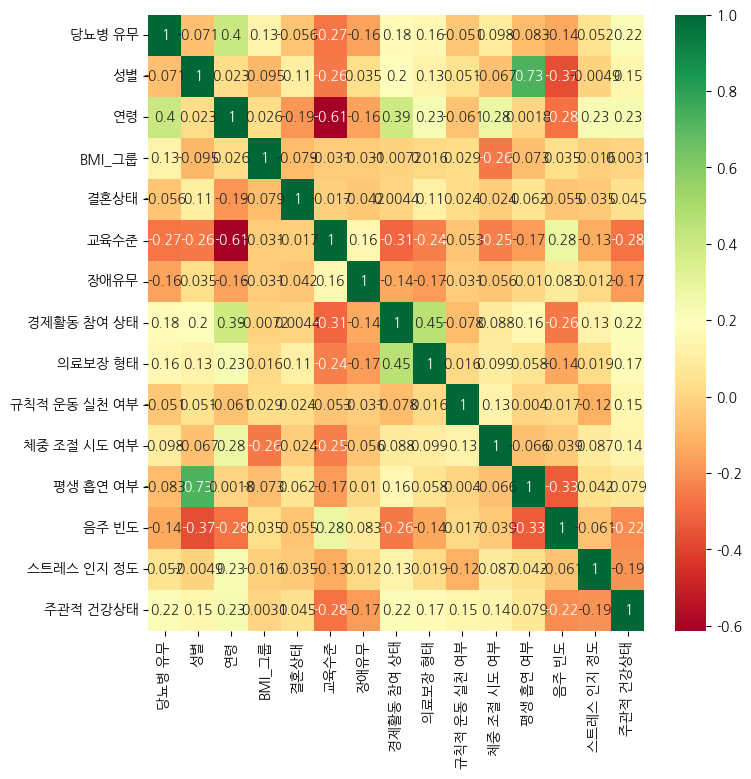

In [29]:
plt.figure(figsize=(8, 8))
sns.heatmap(a_ind_[['당뇨병 유무', '성별', '연령', 'BMI_그룹', '결혼상태', '교육수준',
                    '장애유무', '경제활동 참여 상태', '의료보장 형태', '규칙적 운동 실천 여부',
                    '체중 조절 시도 여부', '평생 흡연 여부', '음주 빈도', '스트레스 인지 정도', '주관적 건강상태'
                    ]].corr(), annot=True, cmap='RdYlGn')
# 당뇨병 - 연령, 결혼상태, 체중 조절 시도, 흡연, 음주, 스트레스, 주관적 건강상태

In [ ]:
# sns.histplot(data=a_ind_, x='연령', hue='당뇨병 유무', multiple="stack")
# sns.histplot(data=a_ind_, x='교육수준', hue='당뇨병 유무', multiple="stack")

In [ ]:
# fig, ax = plt.subplots(4, 2, figsize=(8, 12))
# sns.histplot(a_ind_['연령'], ax=ax[0, 0])
# sns.histplot(a_ind_['성별'], ax=ax[0, 1])
# sns.histplot(a_ind_['BMI_그룹'], ax=ax[1, 0])
# sns.histplot(a_ind_['교육수준'], ax=ax[1, 1])
# sns.histplot(a_ind_['평생 흡연 여부'], ax=ax[2, 0])
# sns.histplot(a_ind_['음주 빈도'], ax=ax[2, 1])
# sns.histplot(a_ind_['주관적 건강상태'], ax=ax[3, 0])
# sns.histplot(a_ind_['체중 조절 시도 여부'], ax=ax[3, 1])

### 회귀분석

In [35]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

X = a_ind_[['성별', '연령', 'BMI_그룹', '교육수준', '주관적 건강상태', '의료보장 형태',
            '규칙적 운동 실천 여부', '체중 조절 시도 여부', '평생 흡연 여부', '음주 빈도',
            # '장애유무', '경제활동 참여 상태', '결혼상태', '스트레스 인지 정도'
            ]]
y = a_ind_['당뇨병 유무']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')

SVM Accuracy: 0.710691823899371


In [37]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree}')

Decision Tree Accuracy: 0.6053459119496856


In [38]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')
# mse_xgb = mean_squared_error(y_test, y_pred_xgb)
# print(f'XGBoost Mean Squared Error: {mse_xgb}')

XGBoost Accuracy: 0.6477987421383647


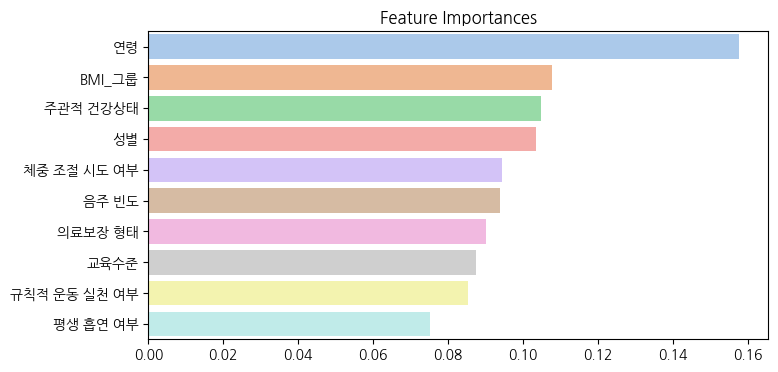

In [39]:
importances_values = xgb_model.feature_importances_
importances = pd.Series(importances_values, index = X_train.columns)
top = importances.sort_values(ascending=False)

# plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.figure(figsize=(8,4))
plt.title('Feature Importances')
sns.barplot(x=top, y=top.index, palette = "pastel")
plt.show()

In [40]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic}')

Logistic Regression Accuracy: 0.7028301886792453


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
import statsmodels.api as sm

logreg = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.578576
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 당뇨병 유무   No. Observations:                 2542
Model:                          Logit   Df Residuals:                     2531
Method:                           MLE   Df Model:                           10
Date:                Wed, 20 Sep 2023   Pseudo R-squ.:                  0.1652
Time:                        12:28:25   Log-Likelihood:                -1470.7
converged:                       True   LL-Null:                       -1761.8
Covariance Type:            nonrobust   LLR p-value:                1.188e-118
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.3187      0.594     -7.275      0.000      -5.482      -3.155
성별              -0.4345

In [ ]:
# # odds ratio 구하는 부분
# odds = np.exp(logreg.params)

# for i in range(len(odds)-1):
#     print(f'변수 {X_train.columns[i]}의 logit : {logreg.params[i] : .3f}')
#     print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이 {logreg.params[i] : .3f}배 증가한다.')
#     print(f'변수 {X_train.columns[i]}의 odds ratio : {odds[i] : .3f}')
#     print(f'변수 {X_train.columns[i]}가 1단위 증가할 때, 당뇨병에 걸릴 확률이 그렇지 않을 경우보다 {odds[i] : .3f}배 증가한다.\n')

## ind3

In [45]:
a_ind3 = a_ind1.copy()
a_ind3['시도'].unique()

array(['26', '48', '43', '47', '31', '29', '46', '45', '41', '11', '28',
       '36', '30', '44', '42', '27', '50'], dtype=object)

In [46]:
region = {
    '11': '서울특별시', '26': '부산광역시', '27': '대구광역시', '28': '인천광역시',
    '29': '광주광역시', '30': '대전광역시', '31': '울산광역시', '36': '세종시',
    '41': '경기도', '42': '강원도', '43': '충청북도', '44': '충청남도',
    '45': '전라북도', '46': '전라남도', '47': '경상북도', '48': '경상남도', '50': '제주도'
}

# a_ind1.loc[a_ind1['REGION1']=='11', 'REGION1'] = '서울특별시'
a_ind3['시도'] = a_ind3['시도'].map(region)

In [47]:
b_ind3 = b_ind1.copy()
# b_ind3 = b_ind3.iloc[:, :-10]
b_ind3['시도'] = b_ind3['시도'].map(region)

In [48]:
b_ind3.loc[(b_ind2['연령'] >= 1), '연령_그룹'] = '30대 이하'
b_ind3.loc[(b_ind2['연령'] >= 40), '연령_그룹'] = '40대'
b_ind3.loc[(b_ind2['연령'] >= 50), '연령_그룹'] = '50대'
b_ind3.loc[(b_ind2['연령'] >= 60), '연령_그룹'] = '60대'
b_ind3.loc[(b_ind2['연령'] >= 70), '연령_그룹'] = '70대'
b_ind3.loc[(b_ind2['연령'] >= 80), '연령_그룹'] = '80대 이상'
# b_ind3['연령_그룹']

In [49]:
c_ind3 = c_ind1.copy()
c_ind3['시도'] = c_ind3['시도'].map(region)

In [50]:
c_ind3.loc[(c_ind2['연령'] >= 1), '연령_그룹'] = '30대 이하'
c_ind3.loc[(c_ind2['연령'] >= 40), '연령_그룹'] = '40대'
c_ind3.loc[(c_ind2['연령'] >= 50), '연령_그룹'] = '50대'
c_ind3.loc[(c_ind2['연령'] >= 60), '연령_그룹'] = '60대'
c_ind3.loc[(c_ind2['연령'] >= 70), '연령_그룹'] = '70대'
c_ind3.loc[(c_ind2['연령'] >= 80), '연령_그룹'] = '80대 이상'
# c_ind3['연령_그룹']

In [51]:
cd1 = {'1': '예', '2': '아니요', '-9': '모름/무응답', ' ': '-'}
cd2 = {'1': '만 19세 이하', '2': '만 20-29세', '3': '만 30-49세',
       '4': '만 50-64세', '5': '만 65세 이상', '-9': '모름/무응답', ' ': '-'}

a_ind3['만성질환 유무'] = a_ind3['만성질환 유무'].map(cd1)
a_ind3['고혈압 유무'] = a_ind3['고혈압 유무'].map(cd1)
a_ind3['고혈압 진단시기'] = a_ind3['고혈압 진단시기'].map(cd2)
a_ind3['당뇨병 유무'] = a_ind3['당뇨병 유무'].map(cd1)
a_ind3['당뇨병 진단시기'] = a_ind3['당뇨병 진단시기'].map(cd2)
a_ind3['우울증/조울증 유무'] = a_ind3['우울증/조울증 유무'].map(cd1)
a_ind3['우울증/조울증 진단시기'] = a_ind3['우울증/조울증 진단시기'].map(cd2)
a_ind3['치매 유무'] = a_ind3['치매 유무'].map(cd1)
a_ind3['치매 진단시기'] = a_ind3['치매 진단시기'].map(cd2)

In [52]:
p1 = {'1': '함', '2': '하지 않음', ' ': '-'}
p1_1 = {'1': '운동할 시간이 없을 정도로 바빠서', '2': '운동할 공간이 주변에 없어서',
        '3': '하고는 싶지만 귀찮아서', '4': '운동을 좋아하지 않아서', '5': '생각해 본 적이 없어서',
        '6': '운동을 하는 데 드는 비용이 부담 되어서', '7': '기타', ' ': '-'}
wtmg = {'1': '몸무게를 줄이려고 노력했다', '2': '몸무게를 유지하려고 노력했다',
        '3': '몸무게를 늘리려고 노력했다', '4': '몸무게를 조절하기 위해 노력해 본 적 없다', ' ': '-'}
hs1 = {'1': '대단히 많이 느낀다', '2': '많이 느끼는 편이다', '3': '조금 느끼는 편이다', '4': '거의 느끼지 않는다', ' ': '-'}
hs_srh = {'1': '매우 좋음', '2': '좋음', '3': '보통', '4': '나쁨', '5': '매우 나쁨', ' ': '-'}

a_ind3['규칙적 운동 실천 여부'] = a_ind3['규칙적 운동 실천 여부'].map(p1)
a_ind3['규칙적으로 운동하지 않는 이유'] = a_ind3['규칙적으로 운동하지 않는 이유'].map(p1_1)
a_ind3['체중 조절 시도 여부'] = a_ind3['체중 조절 시도 여부'].map(wtmg)
a_ind3['스트레스 인지 정도'] = a_ind3['스트레스 인지 정도'].map(hs1)
a_ind3['주관적 건강상태'] = a_ind3['주관적 건강상태'].map(hs_srh)

In [53]:
b_ind3['만성질환 유무'] = b_ind3['만성질환 유무'].map(cd1)
b_ind3['고혈압 유무'] = b_ind3['고혈압 유무'].map(cd1)
b_ind3['고혈압 진단시기'] = b_ind3['고혈압 진단시기'].map(cd2)
b_ind3['당뇨병 유무'] = b_ind3['당뇨병 유무'].map(cd1)
b_ind3['당뇨병 진단시기'] = b_ind3['당뇨병 진단시기'].map(cd2)
b_ind3['우울증/조울증 유무'] = b_ind3['우울증/조울증 유무'].map(cd1)
b_ind3['우울증/조울증 진단시기'] = b_ind3['우울증/조울증 진단시기'].map(cd2)
b_ind3['치매 유무'] = b_ind3['치매 유무'].map(cd1)
b_ind3['치매 진단시기'] = b_ind3['치매 진단시기'].map(cd2)

In [54]:
ah1 = {'1': '예(결국 가지 못한 적이 있다)', '2': '아니요(가지 못한 적이 없다)',
       '3': '병의원 치료 또는 검사가 필요한 적이 없었다', '-9': '모름/무응답', ' ': '-'}

b_ind3['규칙적 운동 실천 여부'] = b_ind3['규칙적 운동 실천 여부'].map(p1)
b_ind3['규칙적으로 운동하지 않는 이유'] = b_ind3['규칙적으로 운동하지 않는 이유'].map(p1_1)
b_ind3['체중 조절 시도 여부'] = b_ind3['체중 조절 시도 여부'].map(wtmg)
b_ind3['스트레스 인지 정도'] = b_ind3['스트레스 인지 정도'].map(hs1)
b_ind3['주관적 건강상태'] = b_ind3['주관적 건강상태'].map(hs_srh)
b_ind3['병의원 미충족의료 경험'] = b_ind3['병의원 미충족의료 경험'].map(ah1)

In [55]:
c_ind3['만성질환 유무'] = c_ind3['만성질환 유무'].map(cd1)
c_ind3['고혈압 유무'] = c_ind3['고혈압 유무'].map(cd1)
c_ind3['고혈압 진단시기'] = c_ind3['고혈압 진단시기'].map(cd2)
c_ind3['당뇨병 유무'] = c_ind3['당뇨병 유무'].map(cd1)
c_ind3['당뇨병 진단시기'] = c_ind3['당뇨병 진단시기'].map(cd2)
c_ind3['우울증/조울증 유무'] = c_ind3['우울증/조울증 유무'].map(cd1)
c_ind3['우울증/조울증 진단시기'] = c_ind3['우울증/조울증 진단시기'].map(cd2)
c_ind3['치매 유무'] = c_ind3['치매 유무'].map(cd1)
c_ind3['치매 진단시기'] = c_ind3['치매 진단시기'].map(cd2)

In [56]:
c_ind3['규칙적 운동 실천 여부'] = c_ind3['규칙적 운동 실천 여부'].map(p1)
c_ind3['규칙적으로 운동하지 않는 이유'] = c_ind3['규칙적으로 운동하지 않는 이유'].map(p1_1)
c_ind3['체중 조절 시도 여부'] = c_ind3['체중 조절 시도 여부'].map(wtmg)
c_ind3['스트레스 인지 정도'] = c_ind3['스트레스 인지 정도'].map(hs1)
c_ind3['주관적 건강상태'] = c_ind3['주관적 건강상태'].map(hs_srh)
c_ind3['병의원 미충족의료 경험'] = c_ind3['병의원 미충족의료 경험'].map(ah1)

### 시각화

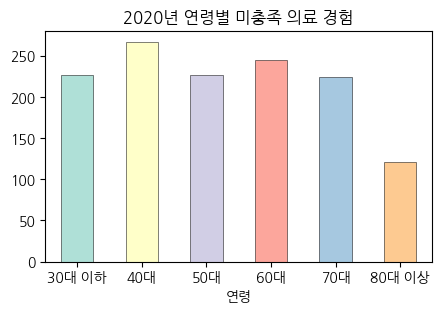

In [57]:
data = b_ind3[b_ind3['병의원 미충족의료 경험'] == '예(결국 가지 못한 적이 있다)']
count_by_state = data.groupby(['연령_그룹'])['병의원 미충족의료 경험'].count()#.sort_values(ascending=False)

plt.figure(figsize=(5, 3))
count_by_state.plot(kind='bar', color=sns.color_palette("Set3"),
                    edgecolor='black', alpha=0.7, linewidth=0.5)
plt.title('2020년 연령별 미충족 의료 경험')
plt.xlabel('연령')
plt.xticks(rotation=0)
# plt.ylim(0, 90)
plt.show()

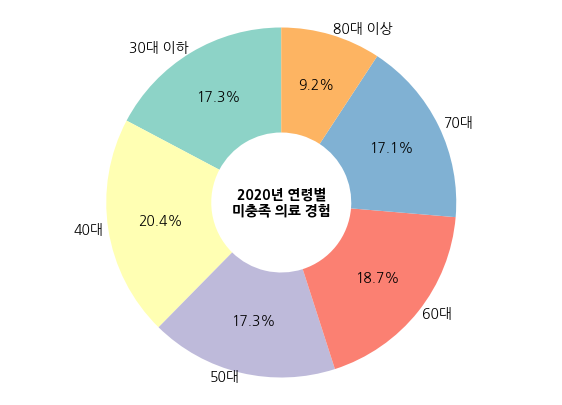

In [90]:
data = b_ind3[b_ind3['병의원 미충족의료 경험'] == '예(결국 가지 못한 적이 있다)']
count_by_state = data.groupby(['연령_그룹'])['병의원 미충족의료 경험'].count()#.sort_values(ascending=False)

plt.figure(figsize=(7, 5))
plt.pie(count_by_state.values, labels=count_by_state.index, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 10},
        pctdistance=0.7, labeldistance=1.03,
        wedgeprops=dict(width=0.6),
        colors=sns.color_palette("Set3"))

plt.text(0, 0, '2020년 연령별\n미충족 의료 경험', fontsize=10, fontweight='bold',
         color='black', ha='center', va='center')
plt.axis('equal')
plt.show()

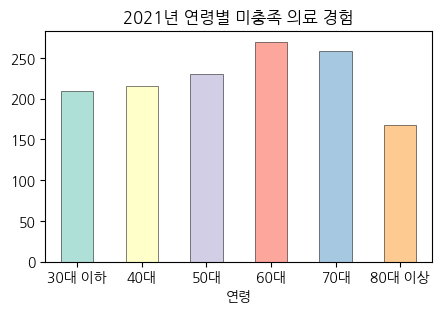

In [58]:
data = c_ind3[c_ind3['병의원 미충족의료 경험'] == '예(결국 가지 못한 적이 있다)']
count_by_state = data.groupby(['연령_그룹'])['병의원 미충족의료 경험'].count()#.sort_values(ascending=False)

plt.figure(figsize=(5, 3))
count_by_state.plot(kind='bar', color=sns.color_palette("Set3"),
                    edgecolor='black', alpha=0.7, linewidth=0.5)
plt.title('2021년 연령별 미충족 의료 경험')
plt.xlabel('연령')
plt.xticks(rotation=0)
# plt.ylim(0, 90)
plt.show()

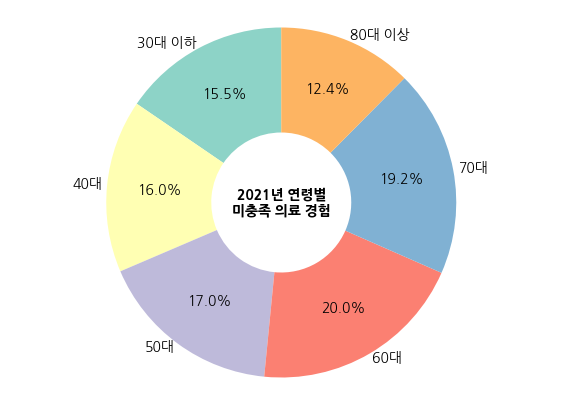

In [89]:
data = c_ind3[c_ind3['병의원 미충족의료 경험'] == '예(결국 가지 못한 적이 있다)']
count_by_state = data.groupby(['연령_그룹'])['병의원 미충족의료 경험'].count()#.sort_values(ascending=False)

plt.figure(figsize=(7, 5))
plt.pie(count_by_state.values, labels=count_by_state.index, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 10},
        pctdistance=0.7, labeldistance=1.03,
        wedgeprops=dict(width=0.6),
        colors=sns.color_palette("Set3"))

plt.text(0, 0, '2021년 연령별\n미충족 의료 경험', fontsize=10, fontweight='bold',
         color='black', ha='center', va='center')
plt.axis('equal')
plt.show()

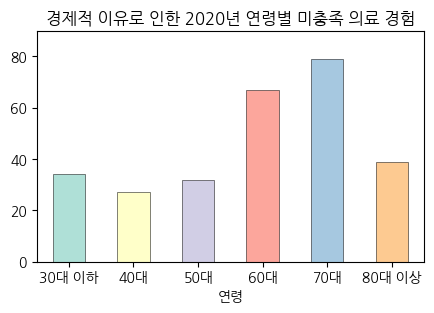

In [61]:
data = b_ind3[b_ind3['병의원 미충족의료 발생 이유(1)']=='1']
count_by_state = data.groupby(['연령_그룹'])['병의원 미충족의료 경험'].count()#.sort_values(ascending=False)

plt.figure(figsize=(5, 3))
count_by_state.plot(kind='bar', color=sns.color_palette("Set3"),
                    edgecolor='black', alpha=0.7, linewidth=0.5)
plt.title('경제적 이유로 인한 2020년 연령별 미충족 의료 경험')
plt.xlabel('연령')
plt.xticks(rotation=0)
plt.ylim(0, 90)
plt.show()

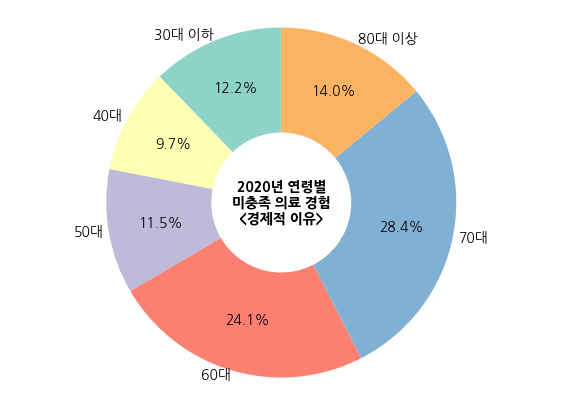

In [60]:
data = b_ind3[b_ind3['병의원 미충족의료 발생 이유(1)']=='1']
count_by_state = data.groupby(['연령_그룹'])['병의원 미충족의료 경험'].count()#.sort_values(ascending=False)

plt.figure(figsize=(7, 5))
plt.pie(count_by_state.values, labels=count_by_state.index, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 10},
        pctdistance=0.7, labeldistance=1.03,
        wedgeprops=dict(width=0.6),
        colors=sns.color_palette("Set3"))

plt.text(0, 0, '2020년 연령별\n미충족 의료 경험\n<경제적 이유>', fontsize=10, fontweight='bold',
         color='black', ha='center', va='center')
plt.axis('equal')
plt.show()

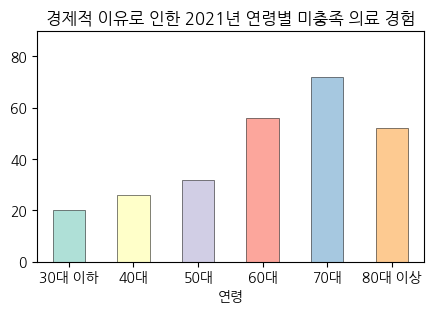

In [63]:
data = c_ind3[c_ind3['병의원 미충족의료 발생 이유(1)']=='1']
count_by_state = data.groupby(['연령_그룹'])['병의원 미충족의료 경험'].count()#.sort_values(ascending=False)

plt.figure(figsize=(5, 3))
count_by_state.plot(kind='bar', color=sns.color_palette("Set3"),
                    edgecolor='black', alpha=0.7, linewidth=0.5)
plt.title('경제적 이유로 인한 2021년 연령별 미충족 의료 경험')
plt.xlabel('연령')
plt.xticks(rotation=0)
plt.ylim(0, 90)
plt.show()

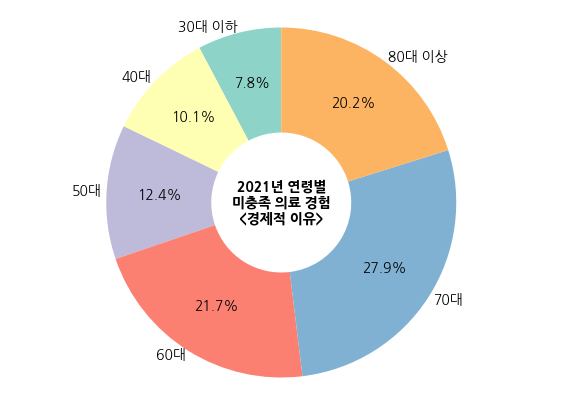

In [62]:
data = c_ind3[c_ind3['병의원 미충족의료 발생 이유(1)']=='1']
count_by_state = data.groupby(['연령_그룹'])['병의원 미충족의료 경험'].count()#.sort_values(ascending=False)

plt.figure(figsize=(7, 5))
plt.pie(count_by_state.values, labels=count_by_state.index, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 10},
        pctdistance=0.7, labeldistance=1.03,
        wedgeprops=dict(width=0.6),
        colors=sns.color_palette("Set3"))

plt.text(0, 0, '2021년 연령별\n미충족 의료 경험\n<경제적 이유>', fontsize=10, fontweight='bold',
         color='black', ha='center', va='center')
plt.axis('equal')
plt.show()

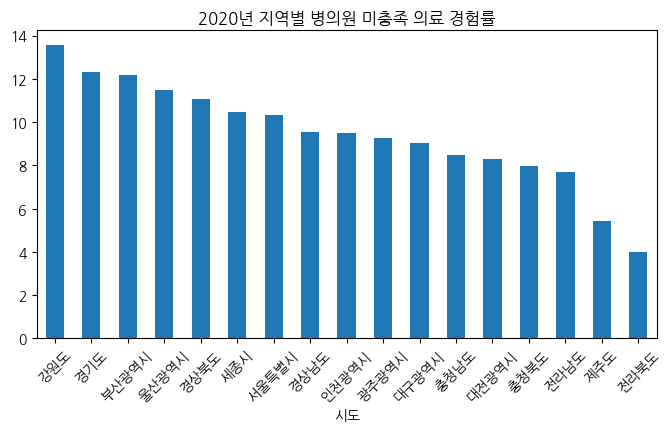

In [87]:
data = b_ind3[b_ind3['병의원 미충족의료 경험'] == '예(결국 가지 못한 적이 있다)']
# count_by_state = data.groupby(['시도'])['병의원 미충족의료 경험'].count().sort_values(ascending=False)
ratio = (data['시도'].value_counts() / b_ind3['시도'].value_counts() * 100)

plt.figure(figsize=(8, 4))
ratio.sort_values(ascending=False).plot(kind='bar')
plt.title('2020년 지역별 병의원 미충족 의료 경험률')
plt.xlabel('시도')
plt.xticks(rotation=45)
plt.show()

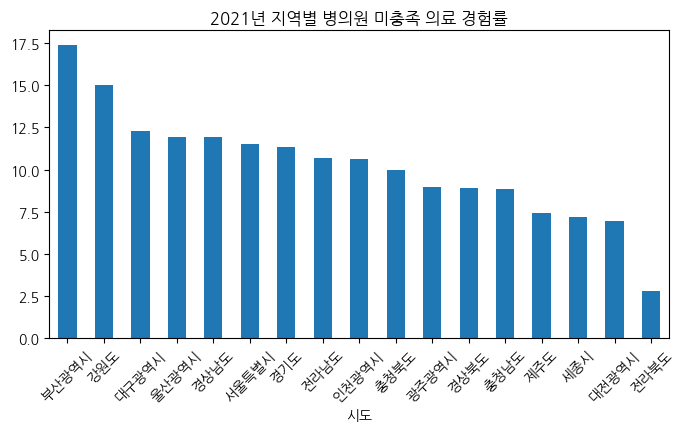

In [88]:
data2 = c_ind3[c_ind3['병의원 미충족의료 경험'] == '예(결국 가지 못한 적이 있다)']
# count_by_state2 = data2.groupby(['시도'])['병의원 미충족의료 경험'].count().sort_values(ascending=False)
ratio2 = (data2['시도'].value_counts() / c_ind3['시도'].value_counts() * 100)

plt.figure(figsize=(8, 4))
ratio2.sort_values(ascending=False).plot(kind='bar')
plt.title('2021년 지역별 병의원 미충족 의료 경험률')
plt.xlabel('시도')
plt.xticks(rotation=45)
plt.show()

In [71]:
df = pd.DataFrame({'2020년': (data['시도'].value_counts() / b_ind3['시도'].value_counts() * 100).values,
              '2021년': (data2['시도'].value_counts() / c_ind3['시도'].value_counts() * 100).values,
              }, index=ratio.index)
df.to_dict()['2020년']

{'강원도': 13.559322033898304,
 '경기도': 12.324766355140188,
 '경상남도': 9.565217391304348,
 '경상북도': 11.080332409972298,
 '광주광역시': 9.271523178807946,
 '대구광역시': 9.037328094302556,
 '대전광역시': 8.275862068965518,
 '부산광역시': 12.17208814270724,
 '서울특별시': 10.321489001692047,
 '세종시': 10.46831955922865,
 '울산광역시': 11.502029769959405,
 '인천광역시': 9.507042253521126,
 '전라남도': 7.673568818514006,
 '전라북도': 4.0126715945089755,
 '제주도': 5.439330543933055,
 '충청남도': 8.487084870848708,
 '충청북도': 7.963709677419355}

In [74]:
metro = df.loc[['서울특별시', '경기도', '인천광역시'], :]
nonmetro = df.loc[['강원도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
                   '부산광역시', '세종시', '울산광역시', '전라남도', '전라북도', '제주도',
                   '충청남도', '충청북도'], :]

<Figure size 800x1000 with 0 Axes>

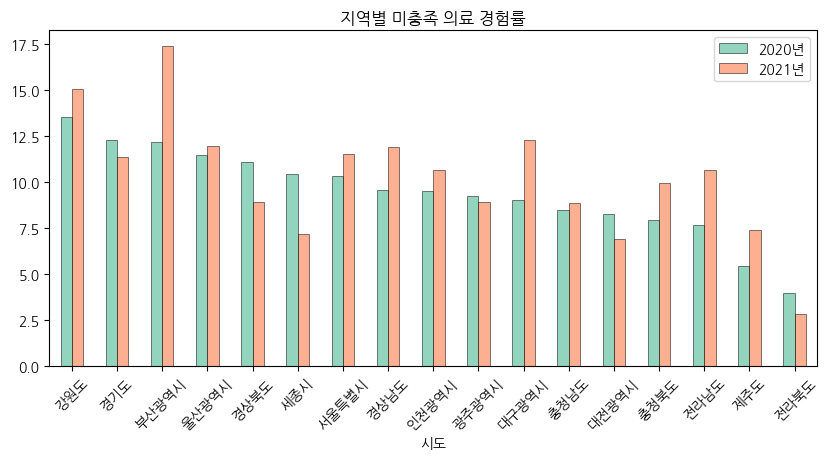

In [75]:
plt.figure(figsize=(8, 10))
df.sort_values(ascending=False, by='2020년').plot(kind='bar',
         color=sns.color_palette('Set2',len(df)),
         edgecolor='black', alpha=0.7, linewidth=0.5)
plt.title('지역별 미충족 의료 경험률')
plt.xlabel('시도')
plt.xticks(rotation=45)
plt.subplots_adjust(left=0.1, right=1.3, top=0.9, bottom=0.2)
plt.show()

In [76]:
bb = b_ind3[b_ind3['병의원 미충족의료 발생 이유(1)']=='1']
cc = c_ind3[c_ind3['병의원 미충족의료 발생 이유(1)']=='1']
len(bb), len(cc)

(278, 258)

In [77]:
bb = bb['시도'].value_counts() / b_ind3[b_ind3['병의원 미충족의료 경험']!='-']['시도'].value_counts() * 100
cc = cc['시도'].value_counts() / c_ind3[c_ind3['병의원 미충족의료 경험']!='-']['시도'].value_counts() * 100

In [78]:
df2 = pd.DataFrame({'2020년': bb.values, '2021년': cc.values,}, index=ratio.index)
df2

,2020년,2021년
강원도,2.139037,1.866667
경기도,3.006939,3.365385
경상남도,2.996670,2.076125
경상북도,2.376910,1.043478
광주광역시,3.539823,4.753199
대구광역시,2.325581,3.560831
대전광역시,0.449438,0.234192
부산광역시,3.713528,4.718218
서울특별시,3.297872,3.251121
세종시,1.659751,1.716738


<Figure size 800x1000 with 0 Axes>

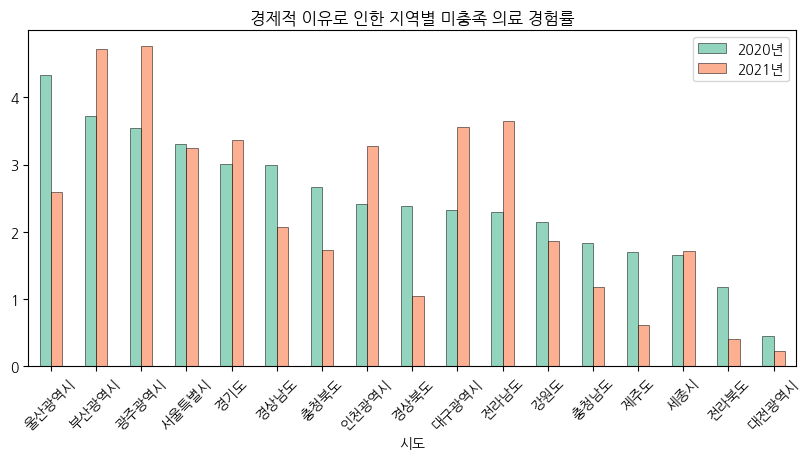

In [79]:
plt.figure(figsize=(8, 10))
df2.sort_values(ascending=False, by='2020년').plot(kind='bar',
         color=sns.color_palette('Set2',len(df)),
         edgecolor='black', alpha=0.7, linewidth=0.5)
plt.title("경제적 이유로 인한 지역별 미충족 의료 경험률")
plt.xlabel('시도')
plt.xticks(rotation=45)
plt.subplots_adjust(left=0.1, right=1.3, top=0.9, bottom=0.2)
plt.show()

Text(0.5, 1.0, '2020년 미충족 의료 경험 이유')

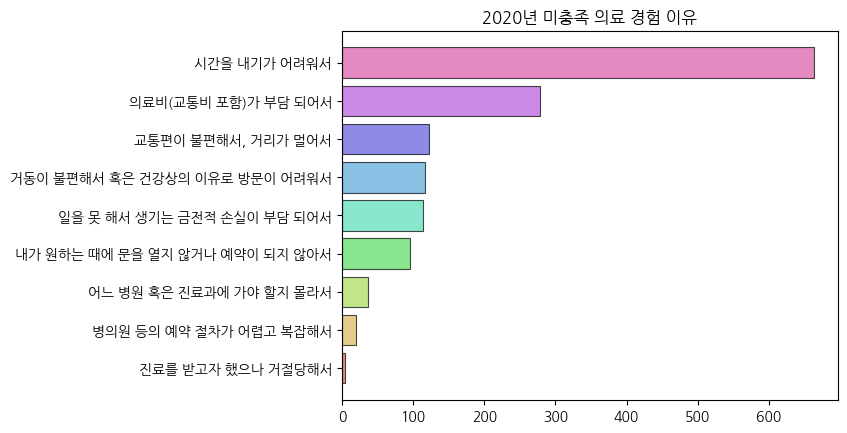

In [80]:
reason_sum = {}
reason = [
    '의료비(교통비 포함)가 부담 되어서',
    '일을 못 해서 생기는 금전적 손실이 부담 되어서',
    '시간을 내기가 어려워서',
    '내가 원하는 때에 문을 열지 않거나 예약이 되지 않아서',
    '어느 병원 혹은 진료과에 가야 할지 몰라서',
    '교통편이 불편해서, 거리가 멀어서',
    '거동이 불편해서 혹은 건강상의 이유로 방문이 어려워서',
    '병의원 등의 예약 절차가 어렵고 복잡해서',
    '진료를 받고자 했으나 거절당해서',
    #  '기타'
]

for i in range(1, 10):
    reason_sum[reason[i-1]] = (b_ind3[f'병의원 미충족의료 발생 이유({i})']=='1').sum()

reason_sum = dict(sorted(reason_sum.items(), key = lambda item: item[1], reverse = False))
plt.barh(list(reason_sum.keys()), list(reason_sum.values()),
         color=sns.color_palette('hls',len(reason_sum)),
         edgecolor='black', alpha=0.7, linewidth=0.8)
plt.title('2020년 미충족 의료 경험 이유')

Text(0.5, 1.0, '2021년 미충족 의료 경험 이유')

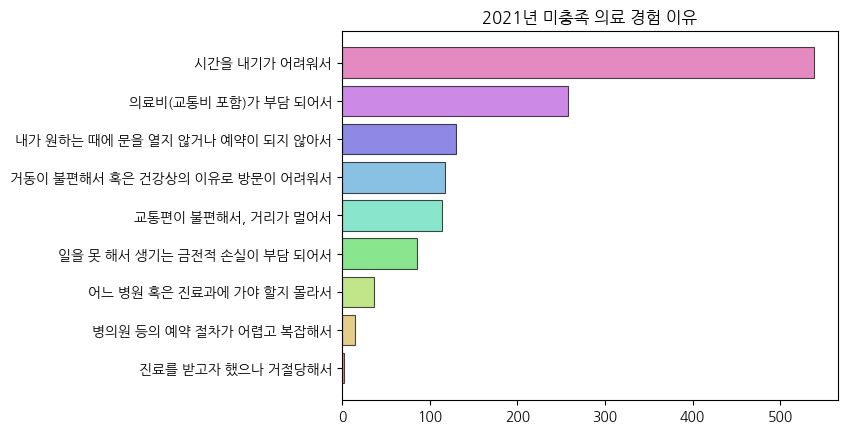

In [81]:
reason_sum2 = {}

for i in range(1, 10):
    reason_sum2[reason[i-1]] = (c_ind3[f'병의원 미충족의료 발생 이유({i})']=='1').sum()

reason_sum2 = dict(sorted(reason_sum2.items(), key = lambda item: item[1], reverse = False))
plt.barh(list(reason_sum2.keys()), list(reason_sum2.values()),
         color=sns.color_palette('hls',len(reason_sum2)),
         edgecolor='black', alpha=0.7, linewidth=0.8)
plt.title('2021년 미충족 의료 경험 이유')

Text(0, 0, '2020년\n미충족의료 경험')

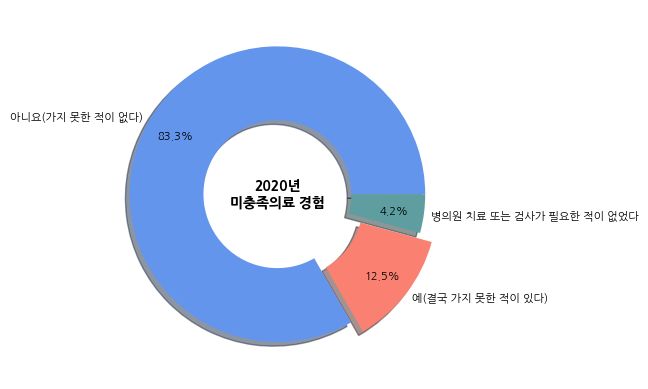

In [82]:
# plt.figure(figsize=(4, 4))
plt.pie(b_ind3[~b_ind3['병의원 미충족의료 경험'].isin(['모름/무응답', '-'])]['병의원 미충족의료 경험'].value_counts(),
        labels=b_ind3[~b_ind3['병의원 미충족의료 경험'].isin(['모름/무응답', '-'])]['병의원 미충족의료 경험'].value_counts().index,
        autopct='%1.1f%%', textprops={'fontsize':8}, startangle=0,
        explode=(0, 0.1, 0), shadow=True,
        pctdistance=0.8, labeldistance=1.05,
        wedgeprops=dict(width=0.5),
        colors=['cornflowerblue', 'salmon', 'cadetblue', 'orange', 'chocolate']
        )

plt.text(0, 0, '2020년\n미충족의료 경험', fontsize=10, fontweight='bold',
         color='black', ha='center', va='center')

Text(0, 0, '2021년\n미충족의료 경험')

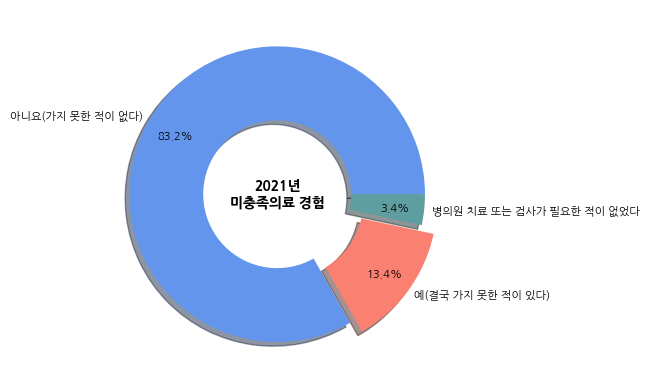

In [83]:
# plt.figure(figsize=(4, 4))
plt.pie(c_ind3[~c_ind3['병의원 미충족의료 경험'].isin(['모름/무응답', '-'])]['병의원 미충족의료 경험'].value_counts(),
        labels=c_ind3[~c_ind3['병의원 미충족의료 경험'].isin(['모름/무응답', '-'])]['병의원 미충족의료 경험'].value_counts().index,
        autopct='%1.1f%%', textprops={'fontsize':8}, startangle=0,
        explode=(0, 0.1, 0), shadow=True,
        pctdistance=0.8, labeldistance=1.05,
        wedgeprops=dict(width=0.5),
        colors=['cornflowerblue', 'salmon', 'cadetblue', 'orange', 'chocolate']
        )

plt.text(0, 0, '2021년\n미충족의료 경험', fontsize=10, fontweight='bold',
         color='black', ha='center', va='center')

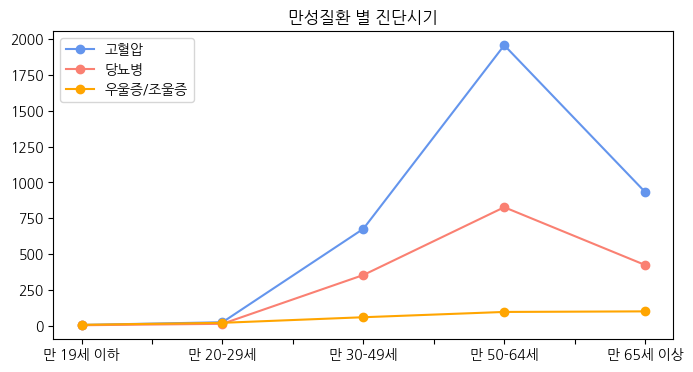

In [85]:
plt.figure(figsize=(8, 4))
a_ind3[~a_ind3['고혈압 진단시기'].isin(['모름/무응답', '-'])]['고혈압 진단시기'].value_counts().sort_index(ascending=True).plot( #kind='bar',
       color='cornflowerblue', marker='o', label='고혈압')
a_ind3[~a_ind3['당뇨병 진단시기'].isin(['모름/무응답', '-'])]['당뇨병 진단시기'].value_counts().sort_index(ascending=True).plot( #kind='bar',
       color='salmon', marker='o', label='당뇨병')
a_ind3[~a_ind3['우울증/조울증 진단시기'].isin(['모름/무응답', '-'])]['우울증/조울증 진단시기'].value_counts().sort_index(ascending=True).plot( #kind='bar',
       color='orange', marker='o', label='우울증/조울증')
# a_ind3[~a_ind3['치매 진단시기'].isin(['모름/무응답', '-'])]['치매 진단시기'].value_counts().sort_index(ascending=True).plot( #kind='bar',
#        color='cadetblue', marker='o', label='치매')
plt.title('만성질환 별 진단시기')
# plt.xlabel('진단시기')
# plt.ylabel('판매량')
# plt.xticks(rotation=90)
plt.legend()
plt.show()